In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.utils import to_categorical

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

C:\Users\Bhumit\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Load data and labels
train_data = np.load('train_data.npy')
labels = np.load('labels.npy')

In [3]:
Y = to_categorical(y=labels, num_classes=10)

In [4]:
Y[14646]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [5]:
x, y = shuffle(train_data, Y, random_state=2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [6]:
x_train.shape

(16851, 28, 28, 1)

In [7]:
x_test.shape

(1873, 28, 28, 1)

In [25]:
tf.reset_default_graph()

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [27]:
from keras.callbacks import TensorBoard

tbcallback = TensorBoard(log_dir='./Graph/', histogram_freq=2, write_graph=True, write_images=True)

In [29]:
model.fit(x_train, y_train, batch_size=50, epochs=1, verbose=1, validation_data=(x_test,y_test), callbacks=[tbcallback])

Train on 16851 samples, validate on 1873 samples
Epoch 1/1
16851/16851 [==============================] - 45s 3ms/step - loss: 0.1044 - acc: 0.9642 - val_loss: 0.1997 - val_acc: 0.9455


In [30]:
# Save model and weights
json_file = model.to_json()
with open('not-mnist-model.json', 'w') as f:
    f.write(json_file)
model.save_weights('not-mnist-weights.h5')

In [2]:
import cv2
def image_invert(image):
    img = cv2.imread(image, 0)
    img = np.array(img)
    copy = np.copy(img)
    copy[copy>50] = 0
    copy[copy>0] = 255
    return copy

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

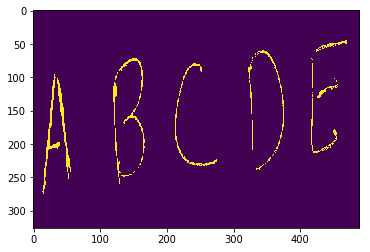

In [5]:
img = image_invert(image='letters_cpy.jpg')
#img = cv2.resize(img, (28,28))
plt.imshow(img)

In [63]:
print(model.predict_classes(img.reshape(1,28,28,1)))

[3]
